In [6]:
import os
from GenerateImageDes.Gemini_Image_description import CheckImageDescriber
import cloudinary.uploader
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from cloudinary.utils import cloudinary_url
from ImageDatabase.cloudinary_image import get_image_url, delete_image, upload_image

In [3]:
load_dotenv()
CLOUD_NAME = os.getenv("CLOUD_NAME")
CLOUDINARY_API_KEY = os.getenv("CLOUDINARY_API_KEY")
CLOUDINARY_API_SECRETKEY = os.getenv("CLOUDINARY_API_SECRETKEY")

cloudinary.config(
  cloud_name = CLOUD_NAME,
  api_key = CLOUDINARY_API_KEY,
  api_secret = CLOUDINARY_API_SECRETKEY
)

In [4]:
# 1. Lấy URL ảnh từ Cloudinary
uuid = "gtrfdvggd"  # hoặc public_id của bạn
url = get_image_url(uuid)

# 2. Tải ảnh từ URL và hiển thị bằng plt
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [5]:
uuid = "gtrfdvggd"  # hoặc public_id của bạn
delete_image(uuid)

{'result': 'ok'}

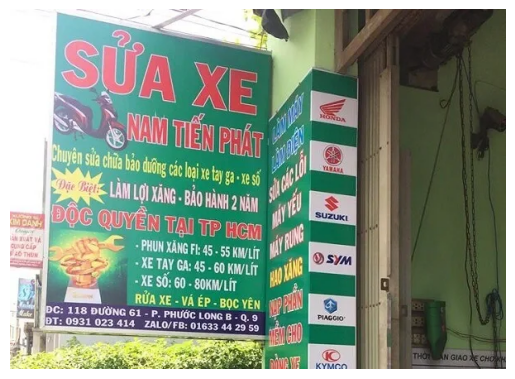

In [6]:
plt.imshow(img)
plt.axis("off")  # Ẩn trục
plt.show()

In [ ]:
from vectorDatabase.manage_collection import get_collection,create_collection